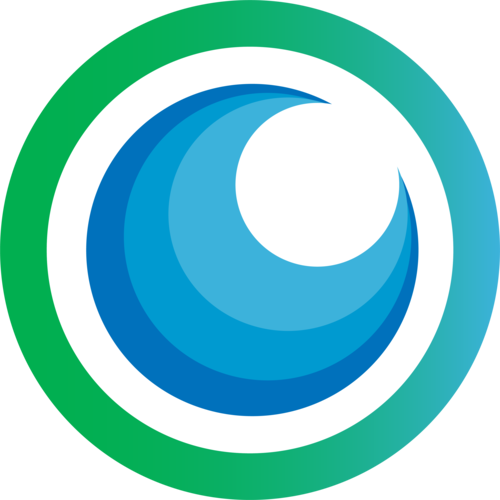
# Epoch Tutorials: TPOT Basics

### Introduction
This notebook is part of the Epoch III onboarding for the engineers departement, and can be used as reference for future competitions on the topic of Automated ML (TPOT). 

### Data
The dataset that is used for this tutorial contains bike rental information per hour in a large European city.
It contains 15 features collected. The goal is to predict the total numbers of bikes rented, which is the 'Total' column.
The dataset consists of 17378 different points. There is no predefined train/test split.

### Contents
- [Data Handling](#Data-Handling)
- [Running TPOT](#Running-TPOT)

In [1]:
# Imports for this tutorial
# Run "pip install -r requirements.txt" in the root folder of the repository to ensure all packages are installed
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from tpot import TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

### Data Handling

##### Loading the data

In [2]:
# Load data in dataframe
def load_dataframe(path: str) -> pd.DataFrame:
    """
    Method to load data from file into pd.DataFrame
    """
    return pd.read_csv(path)

# Load and print data
df = load_dataframe("../data/bike_rental_data.csv")
df.head()

,Unnamed: 0,instant,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
0,0,1,2011-01-01,winter,0,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,1,2,2011-01-01,winter,0,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2,3,2011-01-01,winter,0,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,5,27,32
3,3,4,2011-01-01,winter,0,Jan,3,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,3,10,13
4,4,5,2011-01-01,winter,0,Jan,4,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,0,1,1


##### Preprocessing

In [3]:
# For time purposes, we will only consider the first 500 rows of the dataframe
df = df[:5000]

In [4]:
# Separate the labels
labels = df['Total']

# Preprocessing columns in one loop to floats
for column_name, column_dtype in zip(df.columns, df.dtypes):
    
    # Categorical to int
    if column_dtype == "object":
        df[column_name] = pd.factorize(df[column_name])[0]
        
    # All columns to float
    df[column_name] = list(map(float, df[column_name]))

# Drop noise columns
df = df.drop(['Total', 'Unnamed: 0'], axis=1, inplace=False)

In [5]:
# Split the data between train and test data (20% test data)
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, labels, test_size=0.2)

### Running TPOT

In [ ]:
# As TPOT is a Genetic Algorithm, we need to define population size and the number of generations we want it to run for
GENERATIONS = 5
POP_SIZE = 10
# The cross validation number
CV = 3

# Setting up the Regressor model
tpot = TPOTRegressor(
    generations=GENERATIONS,
    template='Selector-Transformer-Regressor', 
    population_size=POP_SIZE,
    random_state=1,
    n_jobs=-1,
    cv=CV,
    verbosity=2,
    scoring='neg_mean_absolute_error',
)

# If it doesnt work because it complains about a non existent optimization history, just run it again
tpot.fit(X_train, y_train)

In [7]:
# Saving the best pipeline to file
tpot.export('tpot_pipeline.py')